# Un modello di previsione per il mercato immobiliare

RealEstateAI Solutions si propone di ottimizzare la valutazione dei prezzi immobiliari attraverso l'uso di tecniche avanzate di regolarizzazione in modelli di regressione lineare. L'obiettivo è fornire previsioni di prezzo più accurate e affidabili, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione del modello.

Implementando e confrontando metodi di regolarizzazione come Lasso, Ridge e Elastic Net, RealEstateAI Solutions offrirà un sistema in grado di fornire previsioni di prezzo immobiliari più accurate e stabili. Questo permetterà agli agenti immobiliari e agli investitori di prendere decisioni basate su dati più affidabili, aumentando la loro competitività nel mercato.

# Requisiti del progetto

## Fasi del Progetto

### Preparazione del Dataset
- Caricamento e preprocessamento dei dati sui prezzi immobiliari.
- Gestione dei valori mancanti, codifica delle variabili categoriche e normalizzazione/scalatura dei dati.

### Implementazione dei Modelli di Regressione
- **Ridge Regression:** Implementazione e addestramento del modello con regolarizzazione Ridge.
- **Lasso Regression:** Implementazione e addestramento del modello con regolarizzazione Lasso.
- **Elastic Net Regression:** Implementazione e addestramento del modello con regolarizzazione Elastic Net.

### Valutazione delle Performance
- Utilizzo di tecniche di validazione incrociata.
- Calcolo del **Mean Squared Error (MSE)** per ciascun modello.
- Confronto della complessità dei modelli valutando il numero di coefficienti non nulli.
- Analisi e confronto dei risultati dei vari metodi di regolarizzazione.

### Visualizzazione dei Risultati
- Creazione di grafici per visualizzare e confrontare le performance dei modelli.
- Visualizzazione della distribuzione dei residui per valutare l'adeguatezza del modello.

## Il Dataset

* Price: il prezzo, il target da prevedere
* Area: superficie dell’immobile - continuous
* Bedrooms: numero di camere da letto - continuous
* Bathrooms: numero di bagni - continuous
* Stories: numero di piani - continuous
* Mainroad: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti - ohe
* guestroom: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti - ohe
* basement: vale 1 se l’immobile ha un seminterrato, 0 altrimenti - ohe
* hotwaterheating: vale 1 se l’immobile ha una caldaia, 0 altrimenti - ohe
* airconditioning: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti - ohe
* parking: numero di parcheggi - ordinal
* prefarea: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti - ohe
* Furnishingstatus: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato - ordinal

# Implementazione

Il progetto implementa un'analisi per il **mercato immobiliare**, con l'obiettivo di prevedere i prezzi delle proprietà utilizzando modelli di regressione e tecniche di regolarizzazione L2/L1, con il confronto delle metriche per validazioni. Il tutto, corredato da analisi e grafici a sostegno dei risultati.

## Importazione del Dataset

Il dataset rappresenta un insieme di osservazioni di unità immobiliari. Il dataset traccia alcune features caratteristiche di un immobile, come:

* Area: superficie dell’immobile
* Bedrooms: numero di camere da letto
* Bathrooms: numero di bagni
* Stories: numero di piani
* Mainroad: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti
* guestroom: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti
* basement: vale 1 se l’immobile ha un seminterrato, 0 altrimenti
* hotwaterheating: vale 1 se l’immobile ha una caldaia, 0 altrimenti
* airconditioning: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti
* parking: numero di parcheggi
* prefarea: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti
* Furnishingstatus: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato

e ne traccia il relativo prezzo, che è la nostra variabile target.

Non potendo contare su una conoscenza di dominio specifica e non potendo effettuare ulteriori analisi sui dati, i dati verranno analizzati direttamente come forniti. Di seguito carichiamo il dataset e ne mostriamo un estratto:

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/housing.csv')

df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


## Preparazione del dataset

### Feature selection e calcolo delle correlazioni

Prima di lavorare sui dati, verranno applicate alcune tecniche di riduzione della dimensionalità, come la feature selection tramite matrice di correlazione. Questo ci consentirà di rimuovere dati superflui e poco informativi, e di ridurre la complessità totale del dataset.

Le features sono tutte di tipo numerico, e sono quindi confrontabili direttamente tramite coefficiente di Pearson:

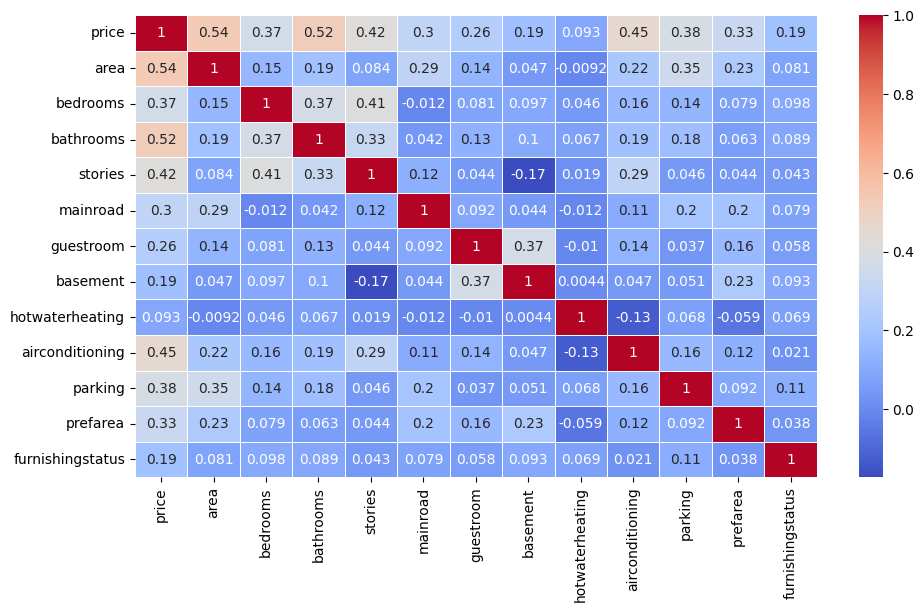

In [48]:
# Feature Correlation Analysis for numerical variables

plt.figure(figsize=(11, 6))

sns.heatmap(df.corr(method="pearson"), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Dall'analisi della matrice sopra mostrata, le features sembrano avere quasi tutte un impatto quantomeno discreto sul target. 

Fanno eccezione **"hotwaterheating"** e **"furnishingstatus"**, che possiedono una *bassa* correlazione (minore di 0.20) non solo con il target, ma anche con le altre features. Vengono quindi rimosse dal dataset:

In [49]:
df = df.drop(['hotwaterheating', "furnishingstatus"], axis=1)

Si confrontano, ora, la relazione tra il target e l'unica feature numerica continua, l'area:

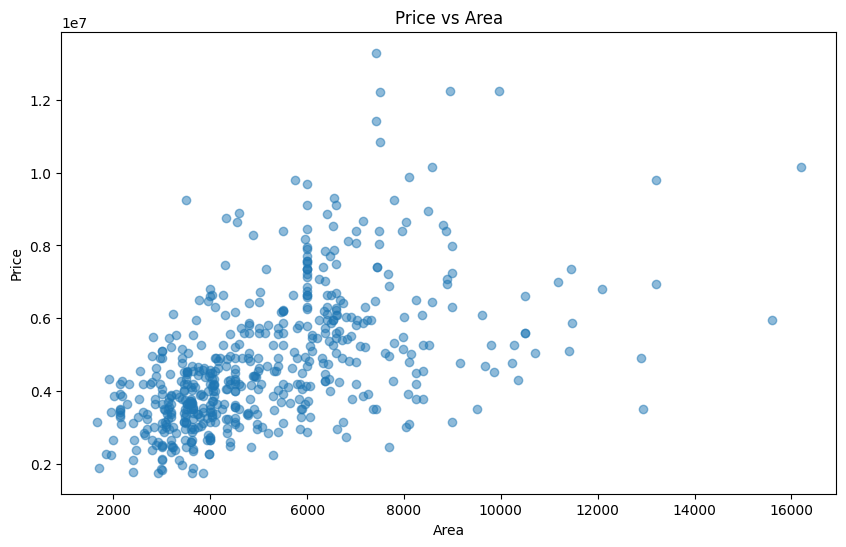

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df["area"], df["price"], alpha=0.5)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title(f'Price vs Area')
plt.show()

Salta subito all'occhio la relazione, che non è netta, ma sicuramente lineare. Da test effettuati, non risulta efficace aggiungere alla feature dei gradi polinomiali (le metriche rimangono costanti). Si lascia comunque il codice per tale operazione commentato nella cella sotto per completezza.

In [51]:
## Not efficient for our correlation analysis

    # from sklearn.preprocessing import PolynomialFeatures

    # poly = PolynomialFeatures(degree=2, include_bias=False)

    # area_poly = poly.fit_transform(df[["area"]])

    # for i in range(area_poly.shape[1]):
    #     df.insert(1, f"area_{i}", area_poly[:, i])

    # df = df.drop(["area"], axis=1)

### Dataset split (feature X - target y)

Dividiamo infine il dataset in feature e target, per comodità:

In [52]:
X = df.drop('price', axis = 1)
y = df['price']

### Verifica della distribuzione del target

Analizziamo ora il target, in particolare osservando la sua distribuzione (con il plot dell'IQR) per evidenziare eventuali outliers:

In [53]:
#Boxplot for target distribution

def show_boxplot(feature):
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(feature, orient="h", color="lightblue")
    plt.title("Distribuzione del target")
    plt.show()

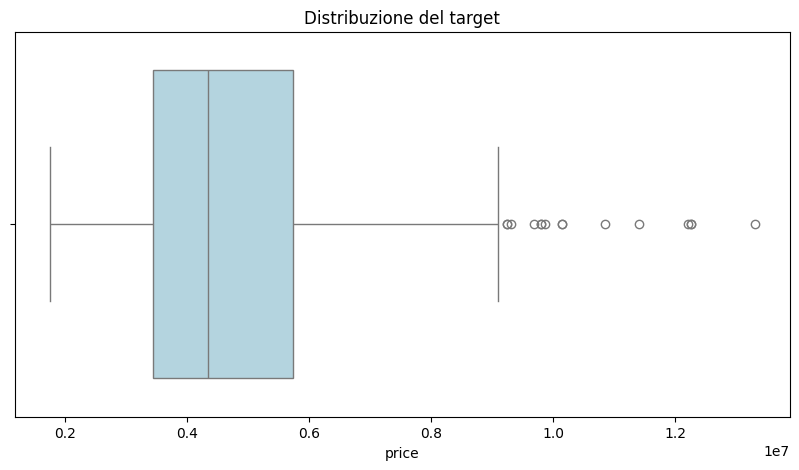

In [54]:
show_boxplot(y)

Si osserva una forte asimmetria positiva. Viene quindi applicata la radice quadrata (più indicata per valori positivi al posto della trasformazione logaritmica) per comprimere i valori. In seguito, verranno anche standardizzati i dati:

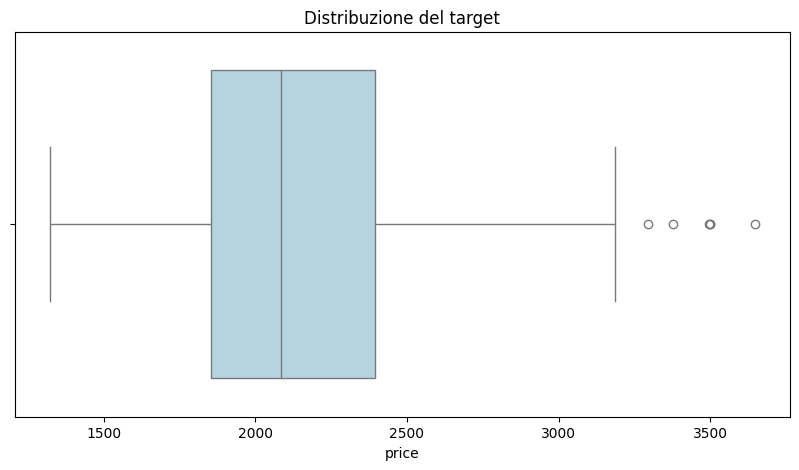

In [55]:
y = np.sqrt(y)

show_boxplot(y)

### Analisi dei valori NA e Null del dataset

Viene ora effettuata un'analisi sui dati mancanti: 

In [56]:
df.isna().sum()

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
airconditioning    0
parking            0
prefarea           0
dtype: int64

Dati i risultati, si può affermare che il dataset non ne riporta. Non è quindi necessario effettuare imputazioni o rimozioni di features/ ulteriori osservazioni particolari.

### Verifica di classi non bilanciate e outliers

In [57]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


Analizzando il contenuto e i valori statistici calcolati sui dati, osserviamo un discreto numero di osservazioni lontane dal valore medio per alcune features numeriche continue. Verifichiamo quindi le distribuzioni:

In [58]:
def show_distribution(feature):
    
    plt.figure(figsize=(10, 5))
    sns.histplot(feature, color="lightblue")
    plt.title(f"Distribuzione della feature {feature.name}")
    plt.ylabel("Conteggio")
    plt.show()

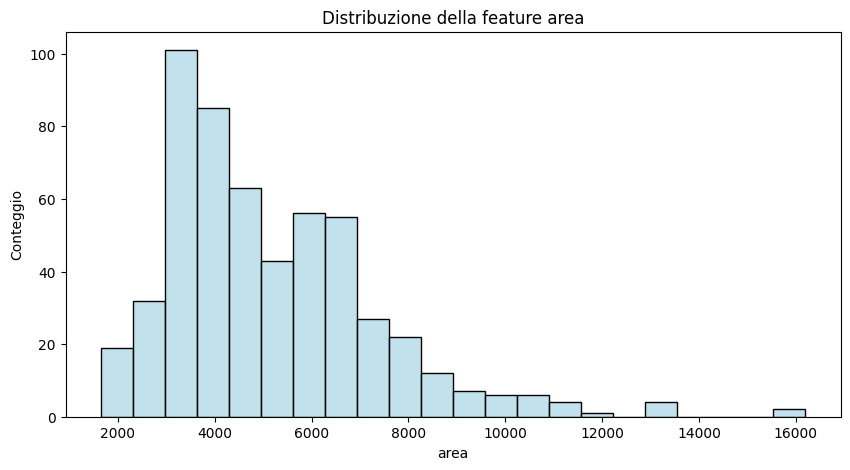

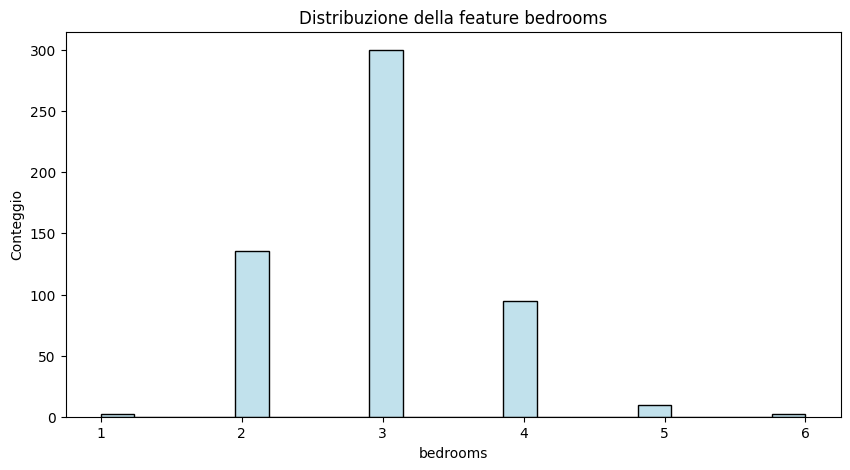

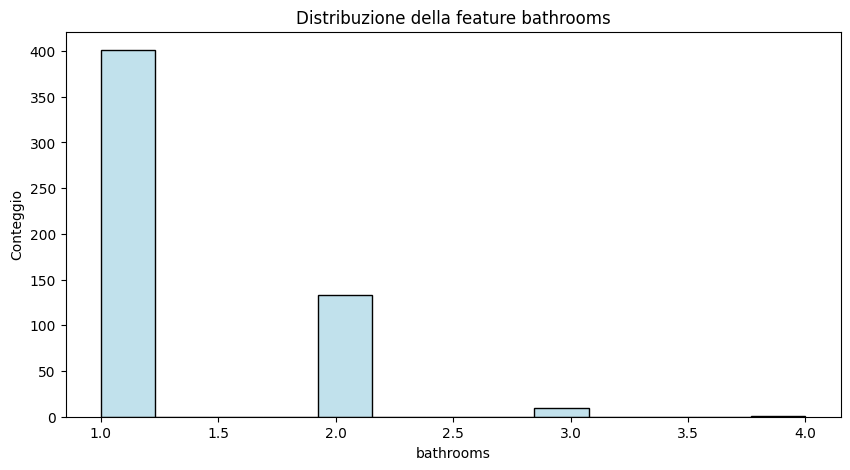

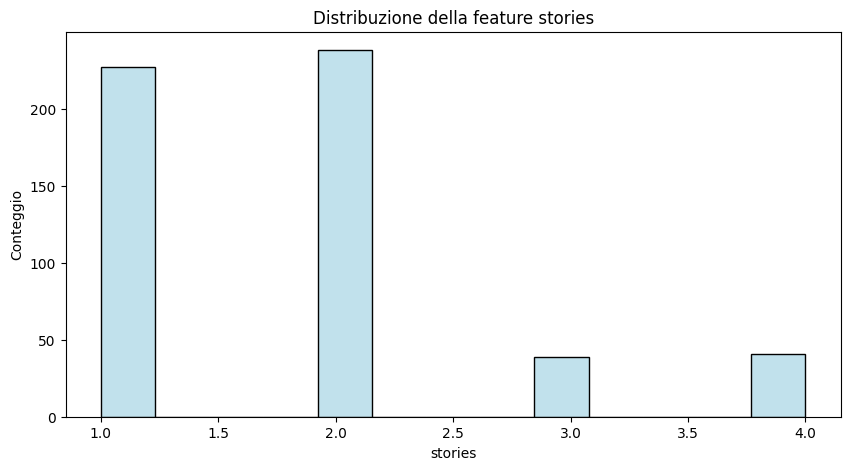

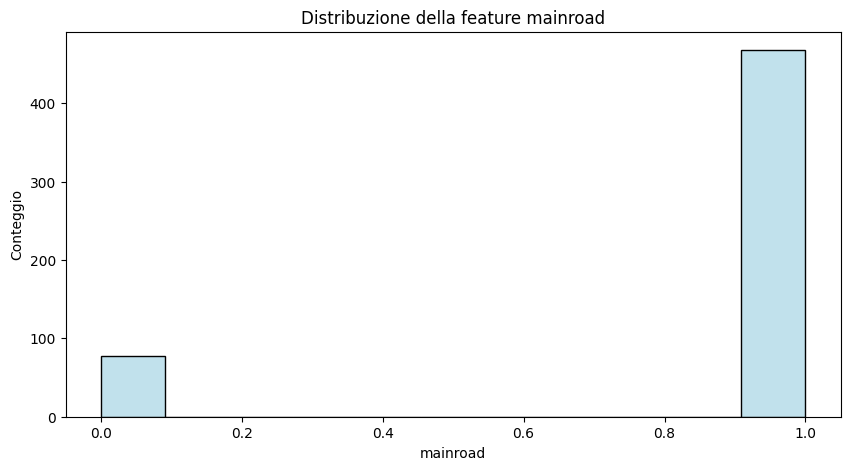

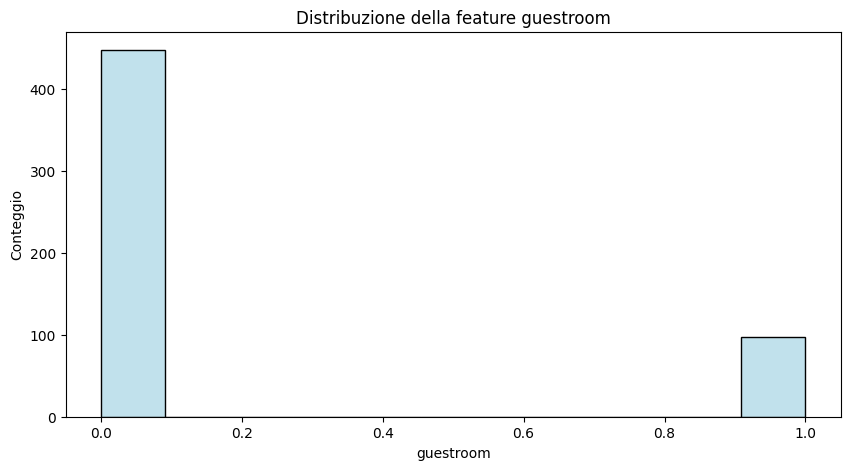

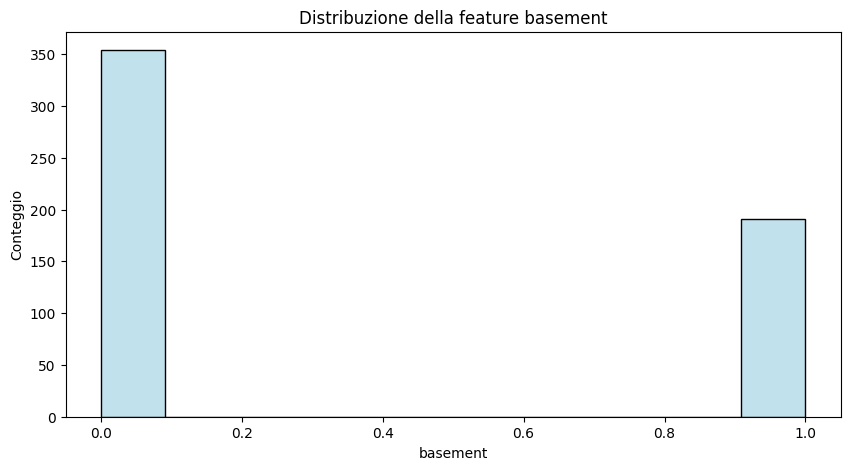

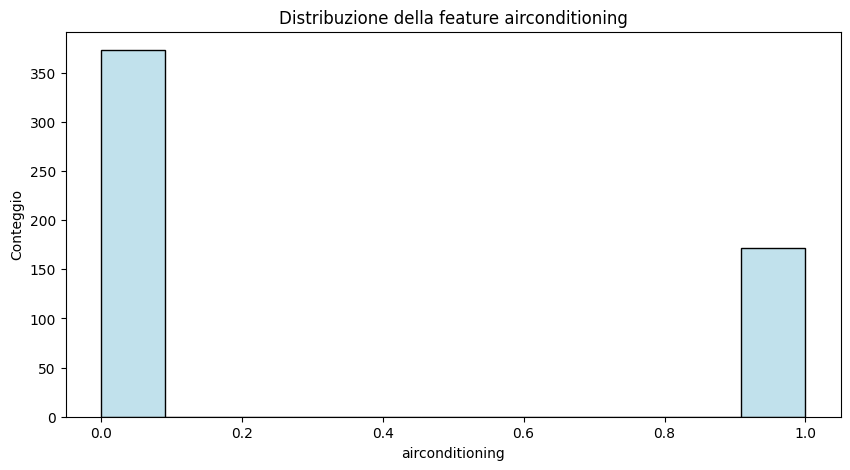

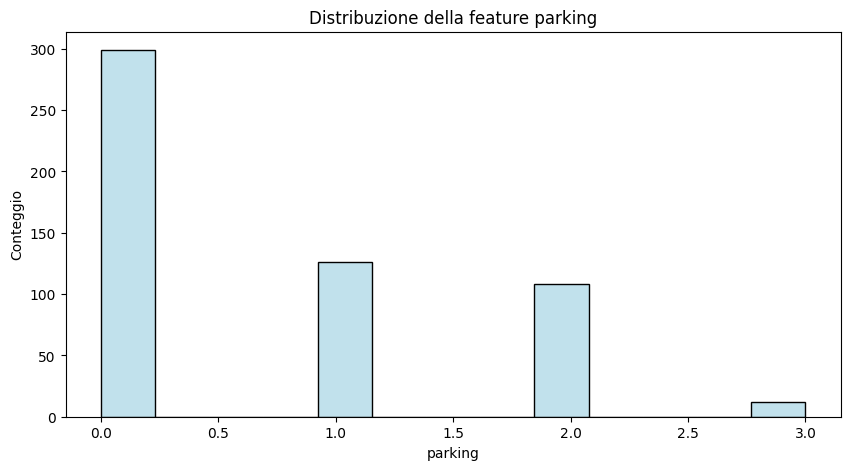

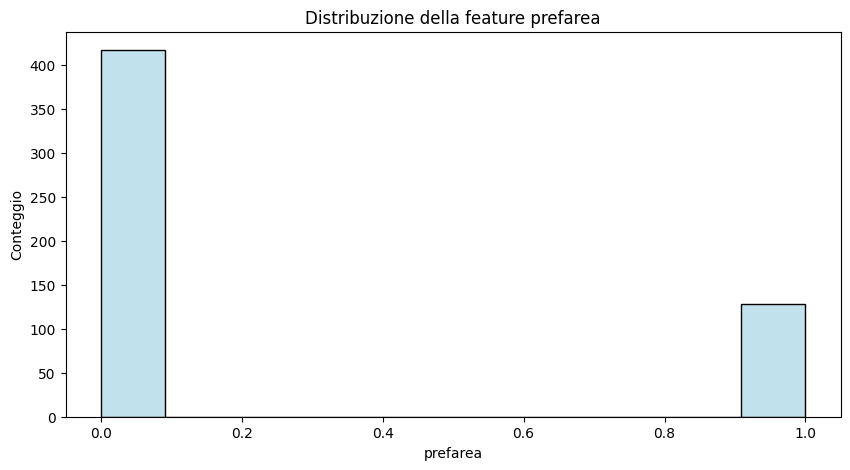

In [59]:
for feature in X.columns:
    show_distribution(X[feature])

La rappresentazione delle distribuzioni sopra evidenziata conferma la presenza di alcune classi sbilanciate, in particolare **Area**. Tuttavia, esistendo troppi pochi esempi per la feature, non risulta efficace generare sample sintetici per bilanciarle.

### Analisi delle variabili categoriche

Come già accennato in precedenza, il dataset riporta valori esclusivamente numerici. Non risultano necessarie quindi trasformazioni di variabili categoriche come il One-Hot Encoding o il Label Encoding.

### Analisi delle variabili numeriche e scaling

Risulta, invece, necessario effettuare lo scaling dei dati. Si opta per la standardizzazione, data la presenza di alcuni outliers verificata nei punti precedenti:

In [60]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X[X.columns] = ss.fit_transform(X[X.columns])

In [61]:
X.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea
count,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,545.000000,545.000000
mean,-1.564498e-16,-1.825247e-16,-2.607496e-17,-1.303748e-16,-1.825247e-16,5.214993e-17,-7.822489e-17,-5.214993e-17,0.000000,0.000000
std,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919,1.000919
min,-1.614530e+00,-2.665004e+00,-5.701867e-01,-9.293967e-01,-2.465344e+00,-4.653148e-01,-7.345393e-01,-6.790626e-01,-0.805741,-0.554035
25%,-7.151451e-01,-1.308863e+00,-5.701867e-01,-9.293967e-01,4.056229e-01,-4.653148e-01,-7.345393e-01,-6.790626e-01,-0.805741,-0.554035
50%,-2.539222e-01,4.727831e-02,-5.701867e-01,2.244101e-01,4.056229e-01,-4.653148e-01,-7.345393e-01,-6.790626e-01,-0.805741,-0.554035
75%,5.578300e-01,4.727831e-02,1.421812e+00,2.244101e-01,4.056229e-01,-4.653148e-01,1.361397e+00,1.472618e+00,0.355976,-0.554035
max,5.096263e+00,4.115701e+00,5.405809e+00,2.532024e+00,4.056229e-01,2.149083e+00,1.361397e+00,1.472618e+00,2.679409,1.804941


Il dataset è così pronto per essere dato in pasto ai modelli di regolarizzazione, che sono oggetto della sezione successiva.

## Creazione e valutazione dei modelli

Verranno ora creati e testati i modelli di regressione. Come da requisiti di progetto, verranno applicate le regolarizzazioni L2, L1 ed ElasticNet.

In [62]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_val_score, KFold

### Definizione dei metodi di cross-validation e model performance evaluation

Definiamo quindi le funzioni di cross-validation e di validazione dei modelli con metriche di MSE, R2 e RMSE:

In [63]:
# Model performance evaluation

from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, dataset, message=None, squared=False, verbose=False):
    X, Y = dataset

    if squared:
        Y_pred = np.square(model.predict(X)) # Inverse the square root transformation
        Y = np.square(Y)
    else:
        Y_pred = model.predict(X)

    mse = mean_squared_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)
    rmse = np.sqrt(mse)

    if verbose:
        if message:
            print(message)
            
        print("Primi 5 valori reali:", Y[:5])
        print("Primi 5 valori predetti:", Y_pred[:5].round(2))

        print("\n")

        print(f"MSE: {mse}")
        print(f"R2: {r2}")
        print(f"RMSE: {rmse}")
        print("\n")

    return mse, r2, rmse

In [64]:
def cross_validation(X, Y, model, cv=5):

    kf = KFold(n_splits=cv, shuffle=True)

    train_mse = []
    train_r2 = []
    train_rmse = []

    test_mse = []
    test_r2 = []
    test_rmse = []

    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
        X = X.values

    if isinstance(Y, pd.DataFrame) or isinstance(Y, pd.Series):
        Y = Y.values
 
    for train_index, test_index in kf.split(X):

        X_train_split, X_test_split = X[train_index], X[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]
        
        #Model fit
        model.fit(X_train_split, Y_train_split)
        
        #Model evaluation
        mse_train, r2_train, rmse_train = evaluate_model(
            model, 
            (X_train_split, Y_train_split), 
            squared=True
        )
        
        mse_test, r2_test, rmse_test = evaluate_model(
            model, 
            (X_test_split, Y_test_split), 
            squared=True
        )

        # Collecting results
        train_mse.append(mse_train)
        train_r2.append(r2_train)
        train_rmse.append(rmse_train)

        test_mse.append(mse_test)
        test_r2.append(r2_test)
        test_rmse.append(rmse_test)
        
    return train_mse, train_r2, train_rmse, test_mse, test_r2, test_rmse

### Definizione delle configurazioni

E definiamo ora una lista di differenti configurazioni dei tre metodi di regolarizzazione con diversi parametri di Lambda:

In [65]:
# Model configurations

configs = [
    Ridge(),
    Ridge(alpha=0.2),
    Ridge(alpha=0.3),
    Ridge(alpha=10),
    Ridge(alpha=100),
    Lasso(),
    Lasso(alpha=0.1),
    Lasso(alpha=10),
    Lasso(alpha=100),
    ElasticNet(),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    ElasticNet(alpha=10, l1_ratio=0.5),
]

### Addestramento e valutazione dei modelli

Effettuiamo ora le validazioni incrociate di Cross Validation sull'intero dataset:

In [66]:
for config in configs:
    print(f"Testing config {config} with cross-validation:\n")

    train_mse, train_r2, train_rmse, test_mse, test_r2, test_rmse = cross_validation(X, y, config)

    print(f"Train Set MSE: {np.mean(train_mse)}")
    print(f"Train Set R2: {np.mean(train_r2)}")
    print(f"Train Set RMSE: {np.mean(train_rmse)}")

    print("\n")

    print(f"Test Set MSE: {np.mean(test_mse)}")
    print(f"Test Set R2: {np.mean(test_r2)}")
    print(f"Test Set RMSE: {np.mean(test_rmse)}")

    print("\n")

Testing config Ridge() with cross-validation:

Train Set MSE: 1138552354468.8062
Train Set R2: 0.6733937574443684
Train Set RMSE: 1066921.6531028904


Test Set MSE: 1191177956833.1953
Test Set R2: 0.6471740845306704
Test Set RMSE: 1089857.468253505


Testing config Ridge(alpha=0.2) with cross-validation:

Train Set MSE: 1139970995448.3691
Train Set R2: 0.6733441077078612
Train Set RMSE: 1067421.5170407533


Test Set MSE: 1181872451425.1863
Test Set R2: 0.6573074977809307
Test Set RMSE: 1082891.1191226952


Testing config Ridge(alpha=0.3) with cross-validation:

Train Set MSE: 1137411779758.1294
Train Set R2: 0.6742771556064812
Train Set RMSE: 1066044.3959207302


Test Set MSE: 1199582145921.9956
Test Set R2: 0.6560987791088342
Test Set RMSE: 1087821.3667630563


Testing config Ridge(alpha=10) with cross-validation:

Train Set MSE: 1137564664029.0354
Train Set R2: 0.6734918971145185
Train Set RMSE: 1066471.920464397


Test Set MSE: 1213746745396.2273
Test Set R2: 0.6433751601875706
Test

Osservando le specifiche, la configurazione che produce un R2 più alto è la Ridge(alpha=0.2). Verranno comunque scelte le seguenti configurazioni per i successivi confronti:

* Ridge(alpha=0.2)
* Lasso(alpha=10)
* ElasticNet(alpha=0.1)

### Addestramento/validazione su hold-out

Replichiamo, per completezza, i test anche su uno split di Hold-Out:

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
for config in configs:
    print(f"Testing config {config} with hold-out:\n")

    model = config

    model.fit(X_train, y_train)

    mse_train, r2_train, rmse_train = evaluate_model(model, (X_train, y_train), squared=True)
    mse_test, r2_test, rmse_test = evaluate_model(model, (X_test, y_test), squared=True)

    print(f"Train Set MSE: {mse_train}")
    print(f"Train Set R2: {r2_train}")
    print(f"Train Set RMSE: {rmse_train}")

    print("\n")

    print(f"Test Set MSE: {mse_test}")
    print(f"Test Set R2: {r2_test}")
    print(f"Test Set RMSE: {rmse_test}")

    print("\n")

Testing config Ridge() with hold-out:

Train Set MSE: 1135644580085.5046
Train Set R2: 0.6641205104370844
Train Set RMSE: 1065666.2611181347


Test Set MSE: 1207152116588.079
Test Set R2: 0.6892308414413235
Test Set RMSE: 1098704.7449556587


Testing config Ridge(alpha=0.2) with hold-out:

Train Set MSE: 1135495617549.3142
Train Set R2: 0.6641645677605613
Train Set RMSE: 1065596.3670871416


Test Set MSE: 1206867810763.644
Test Set R2: 0.6893040331133746
Test Set RMSE: 1098575.3550683921


Testing config Ridge(alpha=0.3) with hold-out:

Train Set MSE: 1135513975382.4575
Train Set R2: 0.6641591382276478
Train Set RMSE: 1065604.9809298273


Test Set MSE: 1206902909662.1108
Test Set R2: 0.6892949972553473
Test Set RMSE: 1098591.3296863902


Testing config Ridge(alpha=10) with hold-out:

Train Set MSE: 1137633617790.0642
Train Set R2: 0.6635322304587847
Train Set RMSE: 1066599.0895317998


Test Set MSE: 1210869507785.572
Test Set R2: 0.6882738365049916
Test Set RMSE: 1100395.1598337626


T

Le metriche sembrano mostrare risultati migliori per la regolarizzazione L1 (Lasso), che rimangono stabili e coerenti anche testando diverse magnitudo di lambda e per entrambe le tecniche di gestione di overfitting. Osserviamo, inoltre, che producono risultati interessanti anche limitandoci all'hold-out (per quanto leggermente più scarse).

### Addestramento dei modelli finali

Riaddestriamo, ora, le configurazioni migliori per tipo di regolarizzazione sopra sull'intero dataset e mostriamo alcune metriche graficamente:

In [69]:
 # Learning curve

from sklearn.model_selection import learning_curve

def show_learning_curve(model, dataset, cv=5):

    X, y = dataset

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=cv,
        scoring="r2"
    )

    plt.figure(figsize=(9, 4))

    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train scores")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test scores")

    plt.title(f"Learning curve - Model {model}")

    plt.legend()

    plt.show()

In [70]:
# Residuals distribution

def plot_residuals(model, X, y, model_name="Modello"):

    # Predizioni del modello
    y_pred = model.predict(X)
    
    # Calcolo dei residui
    residuals = y - y_pred
    
    # Grafico della distribuzione dei residui
    plt.figure(figsize=(9, 4))

    sns.histplot(residuals, color="lightblue")
    plt.axvline(0, color='red', linestyle='--', label="Residuo = 0")
    
    plt.title(f"Distribuzione dei Residui - {model_name}")
    plt.xlabel("Residui")
    plt.ylabel("Conteggio")
    
    plt.legend()
    plt.grid()
    plt.show()

Definiamo le config scelte per tipo:

In [71]:
final_configs = [
    Ridge(alpha=0.2),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
]

E addestriamo/verifichiamo nuovamente i modelli:

Testing config Ridge(alpha=0.2) with all data:

MSE: 1143940636458.8376
R2: 0.672422770171696
RMSE: 1069551.605327596
Numero di coefficienti non nulli: 10


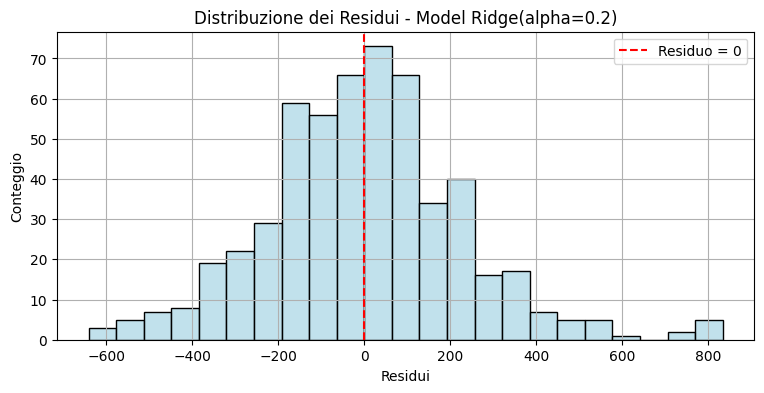

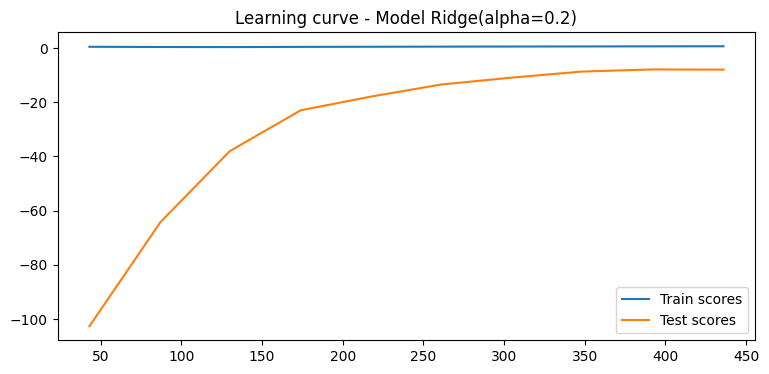

Testing config Lasso(alpha=0.1) with all data:

MSE: 1144011812387.4814
R2: 0.6724023883329953
RMSE: 1069584.8785334812
Numero di coefficienti non nulli: 10


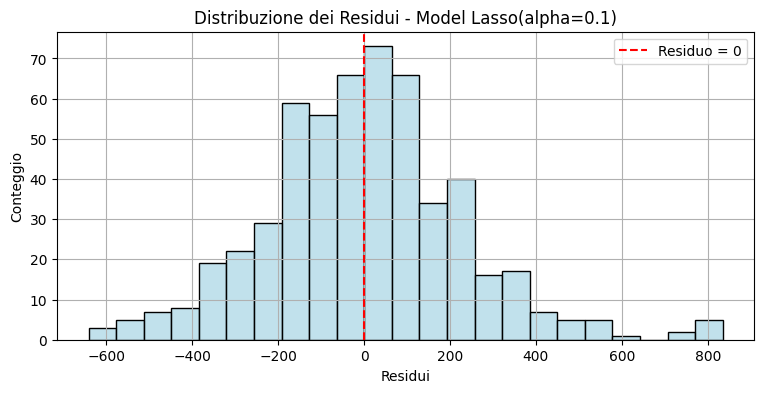

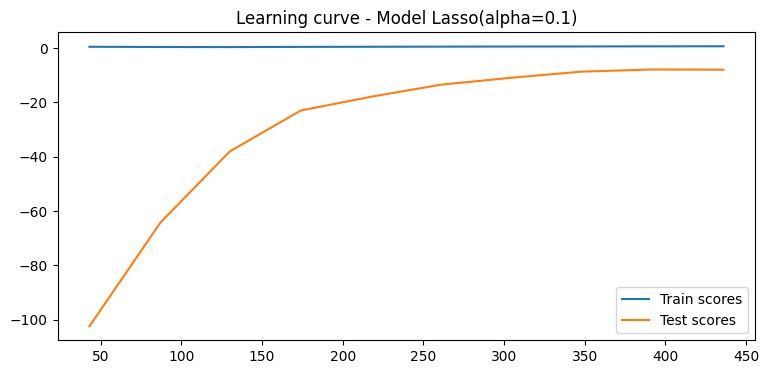

Testing config ElasticNet(alpha=0.1) with all data:

MSE: 1148345758955.9717
R2: 0.6711613254964439
RMSE: 1071608.9580420516
Numero di coefficienti non nulli: 10


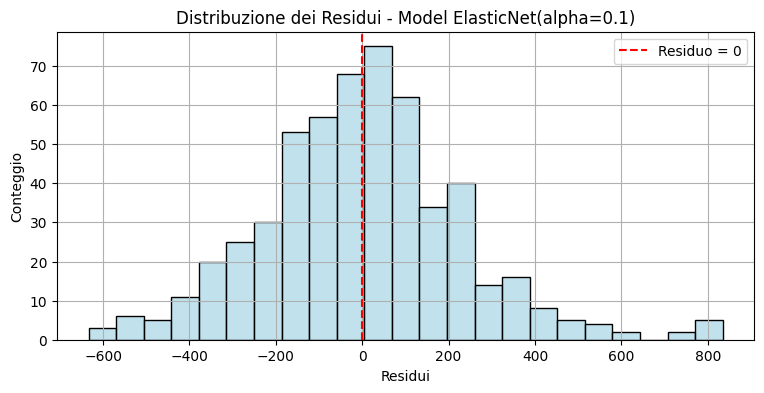

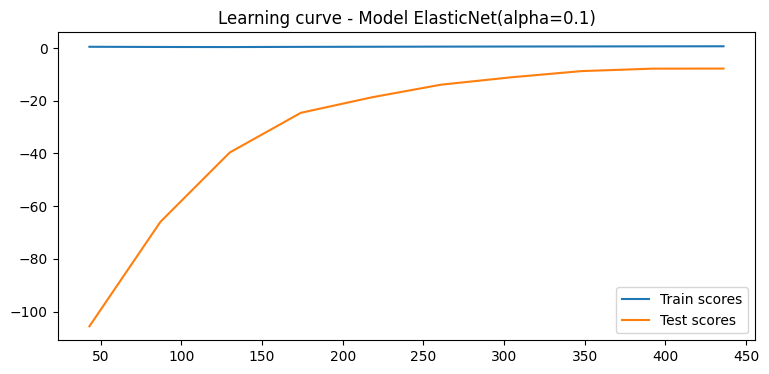

In [72]:
for config in final_configs:
    print(f"Testing config {config} with all data:\n")

    model = config

    model.fit(X, y)

    mse_test, r2_test, rmse_test = evaluate_model(model, (X, y), squared=True, message="Modello migliore con tutti i dati.")

    non_zero_coeffs = np.sum(model.coef_ != 0)

    print(f"MSE: {mse_test}")
    print(f"R2: {r2_test}")
    print(f"RMSE: {rmse_test}")
    print(f"Numero di coefficienti non nulli: {non_zero_coeffs}")

    plot_residuals(model, X, y, model_name=f"Model {config}")

    show_learning_curve(config, (X, y))

    

### Controllo della complessità dei modelli

Notiamo che le metriche risultano essere molto simili. I coefficienti non nulli dei modelli coincidono, suggerendo configurazioni equivalentemente efficaci per le varie regolarizzazioni.

Date le metriche mostrate, non sembra esserci il problema dell'overfitting sul dataset. Inoltre, i residui si distribuiscono bene intorno allo zero, indicando che i modelli non tendono a sovrastimare/sottostimare le predizioni.